In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import sys
sys.path.append("../")
from myMLStudy.MySimpleLinearRegression import *
from myMLStudy.MyPolyLinearRegression import MyPolyLinearRegression

# one element

## load boston data

In [3]:
bostons = datasets.load_boston()

In [4]:
bostons.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
bostons.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = bostons.data
y = bostons.target

In [7]:
X.shape, y.shape

((506, 13), (506,))

In [8]:
X_rm = X[:,5]

In [9]:
X_rm[:10]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004])

In [10]:
X_df = pd.DataFrame(X, columns=bostons.feature_names)
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X_rm = X_rm[y<50.0]
y = y[y<50.0]

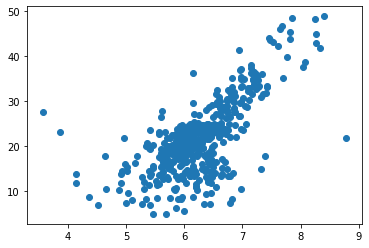

In [12]:
plt.scatter(X_rm, y)

## Simple Linear Regression

In [13]:
def simpleLinearRegression(X, y):
    num = np.sum([(x_i - np.mean(X)) * (y_i - np.mean(y)) for x_i, y_i in zip(X, y)])
    den = np.sum([(X_i - np.mean(X)) ** 2 for X_i in X])
    a = num / den
    b = np.mean(y) - a * np.mean(X)
    return a, b

In [14]:
a, b = simpleLinearRegression(X_rm, y)

In [15]:
a, b

(8.268557322426982, -30.005120145375848)

In [16]:
y_predict = a * X_rm + b

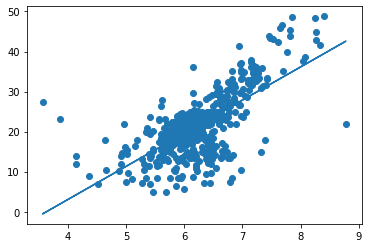

In [17]:
plt.scatter(X_rm, y)
plt.plot(X_rm, y_predict)
plt.show()

## Vectorization

In [18]:
def vectorLinearRegression(X, y):
    num = (X - np.mean(X)).dot(y - np.mean(y))
    den = (X - np.mean(X)).dot(X - np.mean(X))
    a = num / den
    b = np.mean(y) - a * np.mean(X)
    return a, b

In [19]:
a, b = vectorLinearRegression(X_rm, y)

In [20]:
a, b

(8.268557322426982, -30.005120145375848)

## Implement my LinearRegreesion algorithm

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_rm, y, test_size=0.33, random_state=42)

In [22]:
simpleLinear = MySimpleLinearRegression()
simpleLinear.fit(X_train, y_train)

MySimpleLinearRegression()

In [23]:
y_predict_simple = simpleLinear.predict(X_test)

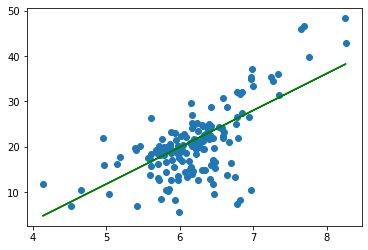

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict_simple, color="g")
plt.show()

In [25]:
vectorLinear = MyVectorLinearRegression()
vectorLinear.fit(X_train, y_train)

MyVectorLinearRegression()

In [26]:
y_predict_vector = vectorLinear.predict(X_test)

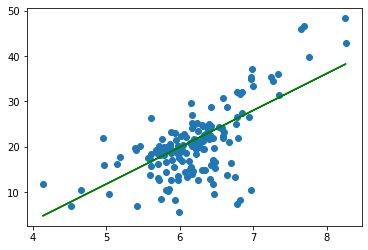

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict_vector, color="g")
plt.show()

## Metrics MAE vs MSE

In [28]:
#MSE
def metric_mse(y_test, y_predict):
    return np.sum((y_test - y_predict) ** 2) / len(y_test)

#RMSE
def metric_rmse(y_test, y_predict):
    return np.sqrt(np.sum((y_test - y_predict) ** 2) / len(y_test))

#MAE
def metric_mae(y_test, y_predict):
    return np.sum(np.absolute((y_test - y_predict))) / len(y_test)

In [29]:
metric_mse(y_test, y_predict_simple), metric_rmse(y_test, y_predict_simple), metric_mae(y_test, y_predict_simple)

(31.7367607150922, 5.633538915734247, 4.082052268970868)

In [30]:
metric_mse(y_test, y_predict_vector), metric_rmse(y_test, y_predict_vector), metric_mae(y_test, y_predict_vector)

(31.736760715092185, 5.633538915734246, 4.082052268970868)

## R Squared

In [31]:
def r2Squared(y_test, y_predict):
    return 1 - (metric_mse(y_test, y_predict) / np.var(y_test))

In [32]:
r2Squared(y_test, y_predict_simple)

0.44036814791812295

In [33]:
r2Squared(y_test, y_predict_vector)

0.4403681479181232

In [34]:
r2_score(y_test, y_predict_vector)

0.4403681479181232

# multi elements

## Normal Equation

In [35]:
X = bostons.data
y = bostons.target
X.shape, y.shape

((506, 13), (506,))

In [36]:
X = X[y < 50.0]
y = y[y < 50.0]
X.shape, y.shape

((490, 13), (490,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [38]:
X_train.shape,y_train.shape

((392, 13), (392,))

In [39]:
myPolyLinear = MyPolyLinearRegression()
myPolyLinear.fit(X_train, y_train)

MyPolyLinearRegression()

In [40]:
y_predict = myPolyLinear.predict(X_test)

In [41]:
myPolyLinear.score(X_test, y_test)

0.8129794056212832

In [42]:
myPolyLinear.coefficients_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [43]:
myPolyLinear.intercept_

34.11739972320428

## skleran LinearRegreesion

In [44]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
linear.score(X_test, y_test)

0.8129794056212809

In [46]:
linear.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [47]:
linear.intercept_

34.117399723229845

## sklearn knn regression

In [48]:
X.shape, y.shape

((490, 13), (490,))

In [49]:
standScale = StandardScaler()
standScale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
X_train_trans = standScale.transform(X_train)
X_test_trans = standScale.transform(X_test)

In [51]:
param_grid = [{"weights":["uniform"], "n_neighbors":[i for i in range(1,11)]},
              {"weights":["distance"], "n_neighbors":[i for i in range(1,11)], "p":[i for i in range(1,6)]}]

In [52]:
knnRegressor = KNeighborsRegressor()

In [53]:
gridSearch = GridSearchCV(knnRegressor, param_grid)

In [54]:
gridSearch.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
gridSearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [56]:
gridSearch.best_score_

0.8121986929882669

In [57]:
gridSearch.best_estimator_.score(X_test_trans, y_test)

0.8703184399069476

## Thinking

In [58]:
linear.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [59]:
np.argsort(linear.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  3,  8,  5])

In [60]:
bostons.feature_names[np.argsort(linear.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'CHAS', 'RAD', 'RM'], dtype='<U7')

In [61]:
print(bostons.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu